# Import necessary dependencies and settings

In [1]:
import datetime
import numpy as np
import pandas as pd
from dateutil.parser import parse
import pytz

# Load and process sample temporal data

In [3]:
time_stamps = ['2015-03-08 10:30:00.360000+00:00', '2017-07-13 15:45:05.755000-07:00',
               '2012-01-20 22:30:00.254000+05:30', '2016-12-25 00:30:00.000000+10:00']
df = pd.DataFrame(time_stamps, columns=['Time'])
df

,Time
0,2015-03-08 10:30:00.360000+00:00
1,2017-07-13 15:45:05.755000-07:00
2,2012-01-20 22:30:00.254000+05:30
3,2016-12-25 00:30:00.000000+10:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


In [5]:
ts_objs = np.array([pd.Timestamp(item) for item in np.array(df['Time'])])
df['TS_obj'] = ts_objs
ts_objs

array([Timestamp('2015-03-08 10:30:00.360000+0000', tz='UTC'),
       Timestamp('2017-07-13 15:45:05.755000-0700', tz='pytz.FixedOffset(-420)'),
       Timestamp('2012-01-20 22:30:00.254000+0530', tz='pytz.FixedOffset(330)'),
       Timestamp('2016-12-25 00:30:00+1000', tz='pytz.FixedOffset(600)')],
      dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    4 non-null      object
 1   TS_obj  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [8]:
df

,Time,TS_obj
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 15:45:05.755000-07:00
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 22:30:00.254000+05:30
3,2016-12-25 00:30:00.000000+10:00,2016-12-25 00:30:00+10:00


# Date based features

In [11]:
df['Year'] = df['TS_obj'].apply(lambda d: d.year)
df['Month'] = df['TS_obj'].apply(lambda d: d.month)
df['Day'] = df['TS_obj'].apply(lambda d: d.day)
df['DayOfWeek'] = df['TS_obj'].apply(lambda d: d.dayofweek)
# df['DayName'] = df['TS_obj'].apply(lambda d: d.weekday_name)
df['DayOfYear'] = df['TS_obj'].apply(lambda d: d.dayofyear)
df['WeekOfYear'] = df['TS_obj'].apply(lambda d: d.weekofyear)
df['Quarter'] = df['TS_obj'].apply(lambda d: d.quarter)

# df[['Time', 'Year', 'Month', 'Day', 'Quarter', 
#     'DayOfWeek', 'DayName', 'DayOfYear', 'WeekOfYear']]

df[['Time', 'Year', 'Month', 'Day', 'Quarter', 
    'DayOfWeek', 'DayOfYear', 'WeekOfYear']]

,Time,Year,Month,Day,Quarter,DayOfWeek,DayOfYear,WeekOfYear
0,2015-03-08 10:30:00.360000+00:00,2015,3,8,1,6,67,10
1,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,3,194,28
2,2012-01-20 22:30:00.254000+05:30,2012,1,20,1,4,20,3
3,2016-12-25 00:30:00.000000+10:00,2016,12,25,4,6,360,51


# Time based features

In [14]:
df['Hour'] = df['TS_obj'].apply(lambda d: d.hour)
df['Minute'] = df['TS_obj'].apply(lambda d: d.minute)
df['Second'] = df['TS_obj'].apply(lambda d: d.second)
df['MUsecond'] = df['TS_obj'].apply(lambda d: d.microsecond)
df['UTC_offset'] = df['TS_obj'].apply(lambda d: d.utcoffset())

df[['Time', 'Hour', 'Minute', 'Second', 'MUsecond', 'UTC_offset']]

,Time,Hour,Minute,Second,MUsecond,UTC_offset
0,2015-03-08 10:30:00.360000+00:00,10,30,0,360000,0 days 00:00:00
1,2017-07-13 15:45:05.755000-07:00,15,45,5,755000,-1 days +17:00:00
2,2012-01-20 22:30:00.254000+05:30,22,30,0,254000,0 days 05:30:00
3,2016-12-25 00:30:00.000000+10:00,0,30,0,0,0 days 10:00:00


In [15]:
df

,Time,TS_obj,Year,Month,Day,DayOfWeek,DayOfYear,WeekOfYear,Quarter,Hour,Minute,Second,MUsecond,UTC_offset
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,2015,3,8,6,67,10,1,10,30,0,360000,0 days 00:00:00
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,194,28,3,15,45,5,755000,-1 days +17:00:00
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 22:30:00.254000+05:30,2012,1,20,4,20,3,1,22,30,0,254000,0 days 05:30:00
3,2016-12-25 00:30:00.000000+10:00,2016-12-25 00:30:00+10:00,2016,12,25,6,360,51,4,0,30,0,0,0 days 10:00:00


In [19]:
hour_bins = [-0.1, 11.99, 23.99 ]
bin_names = ['AM', 'PM']
df['TimeOfDayBin'] = pd.cut(df['Hour'], 
                            bins=hour_bins, labels=bin_names)
df[['Time', 'Hour', 'TimeOfDayBin']]

,Time,Hour,TimeOfDayBin
0,2015-03-08 10:30:00.360000+00:00,10,AM
1,2017-07-13 15:45:05.755000-07:00,15,PM
2,2012-01-20 22:30:00.254000+05:30,22,PM
3,2016-12-25 00:30:00.000000+10:00,0,AM


In [10]:
hour_bins = [-1, 5, 11, 16, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['TimeOfDayBin'] = pd.cut(df['Hour'], 
                            bins=hour_bins, labels=bin_names)
df[['Time', 'Hour', 'TimeOfDayBin']]

,Time,Hour,TimeOfDayBin
0,2015-03-08 10:30:00.360000+00:00,10,Morning
1,2017-07-13 15:45:05.755000-07:00,15,Afternoon
2,2012-01-20 22:30:00.254000+05:30,22,Night
3,2016-12-25 00:30:00.000000+10:00,0,Late Night


In [41]:
df['TZ_info'] = df['TS_obj'].apply(lambda d: d.tzinfo)
df['TimeZones'] = df['TS_obj'].apply(lambda d: list({d.astimezone(tz).tzname() 
                                   for tz in map(pytz.timezone, 
                                                 pytz.all_timezones_set)
                                       if d.astimezone(tz).utcoffset() == d.utcoffset()}))

df[['Time', 'UTC_offset', 'TZ_info', 'TimeZones']]

,Time,UTC_offset,TZ_info,TimeZones
0,2015-03-08 10:30:00.360000+00:00,0 days 00:00:00,UTC,"[WET, +00, UTC, GMT]"
1,2017-07-13 15:45:05.755000-07:00,-1 days +17:00:00,pytz.FixedOffset(-420),"[PDT, MST, -07]"
2,2012-01-20 22:30:00.254000+05:30,0 days 05:30:00,pytz.FixedOffset(330),"[IST, +0530]"
3,2016-12-25 00:30:00.000000+10:00,0 days 10:00:00,pytz.FixedOffset(600),"[ChST, +10, AEST]"


In [12]:
df['TimeUTC'] = df['TS_obj'].apply(lambda d: d.tz_convert(pytz.utc))
df['Epoch'] = df['TimeUTC'].apply(lambda d: d.timestamp())
df['GregOrdinal'] = df['TimeUTC'].apply(lambda d: d.toordinal())

df[['Time', 'TimeUTC', 'Epoch', 'GregOrdinal']]

,Time,TimeUTC,Epoch,GregOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,1.425811e+09,735665
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 22:45:05.755000+00:00,1.499986e+09,736523
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 17:00:00.254000+00:00,1.327079e+09,734522
3,2016-12-25 00:30:00.000000+10:00,2016-12-24 14:30:00+00:00,1.482590e+09,736322


In [13]:
curr_ts = datetime.datetime.now(pytz.utc)
# compute days elapsed since today
df['DaysElapsedEpoch'] = (curr_ts.timestamp() - df['Epoch']) / (3600*24)
df['DaysElapsedOrdinal'] = (curr_ts.toordinal() - df['GregOrdinal']) 

df[['Time', 'TimeUTC', 'DaysElapsedEpoch', 'DaysElapsedOrdinal']]

,Time,TimeUTC,DaysElapsedEpoch,DaysElapsedOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,2010.714825,2011
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 22:45:05.755000+00:00,1152.204346,1153
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 17:00:00.254000+00:00,3153.443993,3154
3,2016-12-25 00:30:00.000000+10:00,2016-12-24 14:30:00+00:00,1353.548163,1354


In [96]:
del Bharti, dt, dt1

In [118]:
Bharti = pd.read_csv('hist_df_latest.csv')
Bharti['date'] = pd.to_datetime(Bharti['date'])
Bharti.head()

,date,open,high,low,close,volume,RSI_14,EMA_3,EMA_7,EMA_10,EMA_14,EMA_21
0,2020-05-08 09:15:00+05:30,536.90,537.05,532.80,535.60,1269786,65.828950,532.481561,530.941617,530.518343,530.260484,530.270784
1,2020-05-08 09:20:00+05:30,536.00,536.90,532.60,533.95,753357,59.676243,533.215780,531.693713,531.142281,530.752419,530.605258
2,2020-05-08 09:25:00+05:30,533.95,535.40,532.40,533.35,559002,57.569115,533.282890,532.107784,531.543684,531.098763,530.854780
3,2020-05-08 09:30:00+05:30,533.35,540.60,533.25,540.00,1564095,70.149544,536.641445,534.080838,533.081196,532.285595,531.686164
4,2020-05-08 09:35:00+05:30,540.05,542.40,537.25,542.00,1190193,72.764925,539.320723,536.060629,534.702797,533.580849,532.623785


In [119]:
Bharti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype                                
---  ------  --------------  -----                                
 0   date    75 non-null     datetime64[ns, pytz.FixedOffset(330)]
 1   open    75 non-null     float64                              
 2   high    75 non-null     float64                              
 3   low     75 non-null     float64                              
 4   close   75 non-null     float64                              
 5   volume  75 non-null     int64                                
 6   RSI_14  75 non-null     float64                              
 7   EMA_3   75 non-null     float64                              
 8   EMA_7   75 non-null     float64                              
 9   EMA_10  75 non-null     float64                              
 10  EMA_14  75 non-null     float64                              
 11  EMA_21  75 non-null  

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

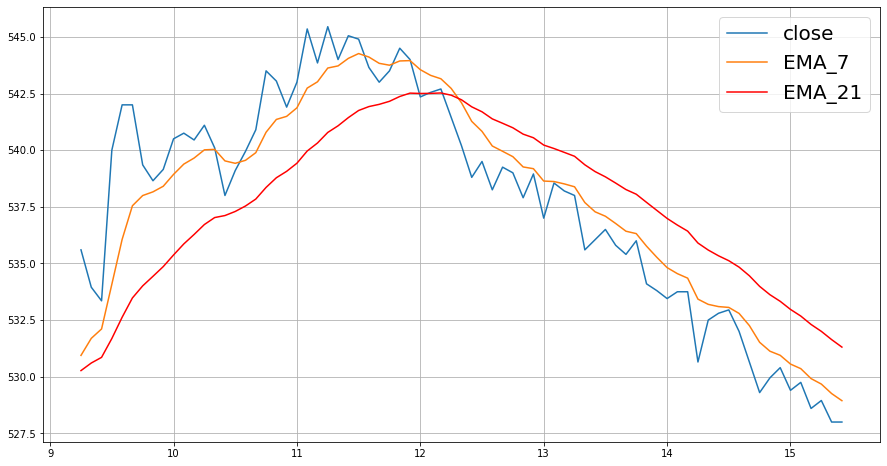

In [124]:
plt.figure(figsize=(15,8))
plt.plot(Bharti['date'], Bharti['close'], label='close')
plt.plot(Bharti['date'], Bharti['EMA_7'], label='EMA_7')
plt.plot(Bharti['date'], Bharti['EMA_21'], 'r-',  label='EMA_21')
plt.legend(fontsize=20)
plt.xticks(ticks = dt, labels=list(range(9,16)))
# plt.xlim(dt1)
plt.grid(True)
plt.show()

In [102]:
times = []
for num in range(9,16):
    s1 = '2020-05-08 ' + str(num) + ':00:00+05:30'
    times.append(s1)
# times = ['2020-05-08 09:00:00+05:30', '2020-05-08 10:00:00+05:30', '2020-05-08 11:00:00+05:30', \
#         '2020-05-08 12:00:00+05:30', '2020-05-08 13:00:00+05:30', '2020-05-08 14:00:00+05:30', \
#         '2020-05-08 15:00:00+05:30']

dt = pd.to_datetime(times)
dt

DatetimeIndex(['2020-05-08 09:00:00+05:30', '2020-05-08 10:00:00+05:30',
               '2020-05-08 11:00:00+05:30', '2020-05-08 12:00:00+05:30',
               '2020-05-08 13:00:00+05:30', '2020-05-08 14:00:00+05:30',
               '2020-05-08 15:00:00+05:30'],
              dtype='datetime64[ns, pytz.FixedOffset(330)]', freq=None)

In [103]:
times = []
for num in range(13,15):
    s1 = '2020-05-08 ' + str(num) + ':00:00+05:30'
    times.append(s1)

dt1 = pd.to_datetime(times)
dt1

DatetimeIndex(['2020-05-08 13:00:00+05:30', '2020-05-08 14:00:00+05:30'], dtype='datetime64[ns, pytz.FixedOffset(330)]', freq=None)

In [131]:
df = pd.read_html('https://en.wikipedia.org/wiki/Filmfare_Awards')

In [133]:
type(df), len(df)

(list, 32)

In [136]:
df[1]

,Nominee,Category,Award,Year
0,Meena Kumari,Best Actress,10th Filmfare Awards,1963
1,Mohammed Rafi,Best Male Playback Singer,16th Filmfare Awards,1969
2,Asha Bhosle,Best Female Playback Singer,20th Filmfare Awards,1973
3,Kishore Kumar,Best Male Playback Singer,32nd Filmfare Awards,1985
4,Alka Yagnik,Best Female Playback Singer,39th Filmfare Awards,1994
5,Javed Akhtar,Best Lyricist,50th Filmfare Awards,2005


In [135]:
df[-1]

,vteThe Times Group,vteThe Times Group.1
0,Corporate directors,Indu Jain Samir Jain Vineet Jain Sahu Jain Sah...
1,Print media,The Times of India The Economic Times Maharash...
2,Television media,ET Now Lead India Mirror Now Movies Now Romedy...
3,Times Internet,CricBuzz Gaana.com MX Player Willow
4,Times Infotainment &Entertainment Network India,Radio Mirchi
5,Times Business Solutions,TBSL TimesJobs SimplyMarry MagicBricks ZigWheels
6,World Wide Media(previously a 50:50 JV with BBC),Filmfare Filmfare Awards Filmfare Awards South...
7,Other businesses,Artha Group (real estate) Bennett University


In [ ]:
pd.read_csv(../input/bank-marketing-campaigns-dataset/bank-additional-full.csv)